### NOTEBOOK FOR PROJECT NAME 

##### get root directory

In [1]:
import os
owd = os.getcwd() 
print(owd)

C:\Users\jawad_zf1uaw5\reference


##### set work directory to current project and copy package template

In [2]:
import shutil

os.chdir(owd)
path = os.getcwd()

#path to packages
projecttemplate = 'projtemplate' + str('\\') +'package'
pathtemplate = str(path) + str('\\') +str(projecttemplate)

#path to current project
projectfolder = 'proj1'
pathproject = str(path) + str('\\') +str(projectfolder)
if not os.path.exists(pathproject):
    os.makedirs(pathproject)
else:
    shutil.rmtree(pathproject)
    os.makedirs(pathproject)

#copy packages to current project
try:
    shutil.copytree(pathtemplate, pathproject + str('\\') +'package')
except:
    print('error in copy ... package might already exist')

#set work directory to current project
os.chdir(pathproject)
path = os.getcwd()
print(path)

C:\Users\jawad_zf1uaw5\reference\proj1


##### import packages necessary for project

In [3]:
from package.collectandtransform import get_file,check_df_missing,clean_df_missing,plot_freq

import pandas as pd
import numpy as np
    
import tensorflow as tf
from keras import optimizers, Sequential, regularizers
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Input, Dropout,Dense, LSTM, RepeatVector, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard
    
from sklearn.preprocessing import StandardScaler,MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.externals import joblib
    
import math
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import scipy.stats import percentileofscore
from collections import Counter
from dateutil import tz
from patsy import dmatrices
import datetime
from datetime import timedelta
    
from pylab import rcParams
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
import tensorflow as tf
set_random_seed(11)
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 123 
DATA_SPLIT_PCT = 0.2
    
rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.
C:\Users\jawad_zf1uaw5\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


##### get data in to a dataframe

In [4]:
path = 'C:\\Users\\jawad_zf1uaw5\\Desktop\\data'
filename = 'data1.csv'
filetype = 'csv'
df = get_file(path,filename,filetype)
print(df.head())

                      id   sla  overdue           x            y  type  c1  \
0               1.01E+11  10.0    -8.98  3105443.57  13832598.28   3.0 NaN   
1  11682872-101001143202  14.0    -7.79  3047695.62  13826869.96   3.0 NaN   
2               1.01E+11  10.0    -8.59  3078170.34  13820368.28   3.0 NaN   
3  11594791-101000891316  15.0   -14.89  3041615.31  13820936.90   3.0 NaN   
4               1.01E+11   4.0     4.57  3041051.24  13824386.21   3.0 NaN   

    c2             timek  
0  4.0  12-02-2020 12:56  
1  4.0  12-02-2020 12:57  
2  4.0  12-02-2020 12:58  
3  4.0  12-02-2020 12:59  
4  4.0  12-02-2020 13:00  


##### set index 

In [ ]:
df.index = pd.to_datetime(df.index, format='%Y.%m.%d.%H.%M.%S')
df = df.sort_index()

##### check data frame for  [columns and row null or missing value analysis]

In [ ]:
df['timek'] = pd.to_datetime(df['timek'])
keys = ['id','timek']
df.index = df[keys]
df_col_info,df_row_info = check_df_missing(df,keys)

In [ ]:
names = list(df_col_info['col'])
values = list(df_col_info['null_per'])

In [ ]:
plt.figure(figsize=(30, 4))
plt.subplot(131)
plt.bar(names, values)
plt.title('COLUMNS WITH NULL VALUE IN PERCENTAGE OF OBSERVATIONS')

In [ ]:
print('COLUMNS NULL ANALYSIS : ' )
df_col_info.head(100)

In [ ]:
print('NUMBER OF OBSERVATIONS WITH ALL COLUMNS AS NULL : ' + str(df_row_info.shape[0]))

In [ ]:
print('OBSERVATIONS NULL ANALYSIS : ' )
df_row_info.head(100)

In [ ]:
print('SHAPE OF DATA BEFORE CLEANING THE MISSING ROWS & COLUMNS FROM NULL ANALYSIS : ' + str(df.shape) )

cols_2_drop = list(df_col_info[df_col_info['null_per']>90]['col'])
cols_2_drop.append('non_null_count')

#drop the rows with all columns as null
#df = clean_df_missing(df,df_row_info,cols_2_drop)

#fill missing value with forward value
df = clean_df_missing(df,pd.DataFrame(),cols_2_drop)

print('SHAPE OF DATA AFTER CLEANING THE MISSING ROWS & COLUMNS FROM NULL ANALYSIS  : ' + str(df.shape) )

In [ ]:
for col in df.columns:
    print('column : ' + str(col) , ' |   type : ' + str(df[col].dtype))
    #print('type : ' + str(df[col].dtype)) 

In [ ]:
plt = plot_freq(df,keys)

plt.show()

In [ ]:
dftrain,dfval = train_test_split(df[features],test_size=0.2,shuffle=False,stratify=None)

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

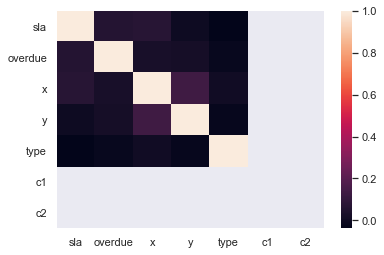

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)